# Imports
***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from pylab import rcParams

%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 20,10
rcParams['font.size'] = 30
sns.set()
np.random.seed(8)

# Loading and visualizing data
***

In [2]:
header_list = ["spec_name", "impl_name", "set_size", "edge_prob", "policy_size", "spec_len", "rego_lines_of_code", "error_rate", "edge_number", "comp_cum_time", "result"]
df = pd.read_csv("equivalence.dat", sep=';', usecols=[0,1,2,3,4,5,6,7,8,9,10], names=header_list)

chunks = pd.read_csv("equivalence.dat", sep=';', usecols=[0,1,2,3,4,5,6,7,8,9,10], names=header_list, chunksize=50000)
slim_data = []
for chunk in chunks:
    chunk["comp_cum_time"] *= 1000
    slim_data.append(chunk)
df = pd.concat(slim_data)

# Seconds to Milliseconds
#df["comp_cum_time"] *= 1000

df

,spec_name,impl_name,set_size,edge_prob,policy_size,spec_len,rego_lines_of_code,error_rate,edge_number,comp_cum_time,result
0,workflow-specs/randomly-generated/10-set-1-0-e...,impl-metagraph-generators/generated-from-rando...,10,1.0,1,24,332,0.0,35,0.188,True
1,workflow-specs/randomly-generated/10-set-1-0-e...,impl-metagraph-generators/generated-from-rando...,10,1.0,1,24,332,0.0,35,0.189,True
2,workflow-specs/randomly-generated/10-set-1-0-e...,impl-metagraph-generators/generated-from-rando...,10,1.0,1,24,332,0.0,35,0.283,True
3,workflow-specs/randomly-generated/10-set-1-0-e...,impl-metagraph-generators/generated-from-rando...,10,1.0,1,24,332,0.0,35,0.125,True
4,workflow-specs/randomly-generated/10-set-1-0-e...,impl-metagraph-generators/generated-from-rando...,10,1.0,1,24,332,0.0,35,0.117,True
...,...,...,...,...,...,...,...,...,...,...,...
1079995,workflow-specs/randomly-generated/100-set-1-0-...,impl-metagraph-generators/generated-from-rando...,100,1.0,2,250,23781,0.7,614,7.668,False
1079996,workflow-specs/randomly-generated/100-set-1-0-...,impl-metagraph-generators/generated-from-rando...,100,1.0,2,250,23781,0.7,614,8.697,False
1079997,workflow-specs/randomly-generated/100-set-1-0-...,impl-metagraph-generators/generated-from-rando...,100,1.0,2,250,23781,0.7,614,8.238,False
1079998,workflow-specs/randomly-generated/100-set-1-0-...,impl-metagraph-generators/generated-from-rando...,100,1.0,2,250,23781,0.7,614,61.615,False


# Removing outliers and harmonizing sample size
***

In [3]:
# All values of predictors
set_sizes = sorted(df.set_size.unique())
policy_sizes = sorted(df.policy_size.unique())
error_rates = sorted(df.error_rate.unique())


# Removing 0.7 error rates values from data
error_rates = error_rates[:-1]


print("Used values:")
print("Set sizes: {}".format(set_sizes))
print("Policy sizes: {}".format(policy_sizes))
print("Error rates: {}".format(error_rates))
print("")


# Making list of DFs by predictors
preds_df_list = []
labels = []
for set_size in set_sizes:
    for policy_size in policy_sizes:
        for error_rate in error_rates:
            print("DF parameters: {} {} {}".format(set_size, policy_size, error_rate))
            labels.append("{} {} {}".format(set_size, policy_size, error_rate))
            preds_df_list.append(df[(df.set_size == set_size) & (df.policy_size == policy_size) & (df.error_rate == error_rate)])
print("\n")


# Print DF shapes
print("Unmodified DF shapes")
for pred_df in preds_df_list:
    print(pred_df.shape)
print("\n")


# Removing outliers in DFs
new_preds_df_list = []
for pred_df in preds_df_list: # Remove all values with Z-score > 3
    new_preds_df_list.append( pred_df[np.abs(pred_df.comp_cum_time-pred_df.comp_cum_time.mean()) <= (3*pred_df.comp_cum_time.std())] )
preds_df_list = new_preds_df_list


# Print DF shapes to check sample sizes, put them in list
preds_df_list_sample_sizes = []
print("No outliers DF shapes")
for pred_df in preds_df_list:
    print(pred_df.shape)
    preds_df_list_sample_sizes.append(pred_df.shape[0])
print("\n")

minimum_sample_size = min(preds_df_list_sample_sizes)
print("Minimum common sample size: {}".format(minimum_sample_size))

# Make sample sizes equal
new_preds_df_list = []
for pred_df in preds_df_list:
    new_preds_df_list.append(pred_df.head(minimum_sample_size))
preds_df_list = new_preds_df_list


# Check new DF shapes
print("Modified DF shapes")
for pred_df in preds_df_list:
    print(pred_df.shape)
print("\n")

Used values:
Set sizes: [10, 20, 30, 50, 100]
Policy sizes: [1, 2]
Error rates: [0.0, 0.2, 0.4]

DF parameters: 10 1 0.0
DF parameters: 10 1 0.2
DF parameters: 10 1 0.4
DF parameters: 10 2 0.0
DF parameters: 10 2 0.2
DF parameters: 10 2 0.4
DF parameters: 20 1 0.0
DF parameters: 20 1 0.2
DF parameters: 20 1 0.4
DF parameters: 20 2 0.0
DF parameters: 20 2 0.2
DF parameters: 20 2 0.4
DF parameters: 30 1 0.0
DF parameters: 30 1 0.2
DF parameters: 30 1 0.4
DF parameters: 30 2 0.0
DF parameters: 30 2 0.2
DF parameters: 30 2 0.4
DF parameters: 50 1 0.0
DF parameters: 50 1 0.2
DF parameters: 50 1 0.4
DF parameters: 50 2 0.0
DF parameters: 50 2 0.2
DF parameters: 50 2 0.4
DF parameters: 100 1 0.0
DF parameters: 100 1 0.2
DF parameters: 100 1 0.4
DF parameters: 100 2 0.0
DF parameters: 100 2 0.2
DF parameters: 100 2 0.4


Unmodified DF shapes
(27000, 11)
(27000, 11)
(27000, 11)
(27000, 11)
(27000, 11)
(27000, 11)
(27000, 11)
(27000, 11)
(27000, 11)
(27000, 11)
(27000, 11)
(27000, 11)
(27000, 11

# Generating DataFrame to make the boxplot
***

In [4]:
## all preds data in one DataFrame
for index, pred_df in enumerate(preds_df_list):
    if index == 0:
        df_all_preds = pd.DataFrame(pred_df["comp_cum_time"].rename(labels[index])) # Add a Series and convert to DataFrame
    else:
        df_all_preds = df_all_preds.assign(placeholder=pred_df["comp_cum_time"].values)
        df_all_preds.columns = labels[0:index+1]

df_all_preds

,10 1 0.0,10 1 0.2,10 1 0.4,10 2 0.0,10 2 0.2,10 2 0.4,20 1 0.0,20 1 0.2,20 1 0.4,20 2 0.0,...,50 1 0.4,50 2 0.0,50 2 0.2,50 2 0.4,100 1 0.0,100 1 0.2,100 1 0.4,100 2 0.0,100 2 0.2,100 2 0.4
0,0.188,0.144,0.471,0.382,0.393,0.378,0.386,0.608,0.600,2.161,...,2.104,2.660,3.216,3.786,7.919,13.412,4.295,11.669,10.379,6.907
1,0.189,0.174,0.249,0.319,0.385,0.440,0.405,0.638,0.935,0.958,...,2.517,2.819,3.268,3.280,6.557,6.551,3.491,13.698,11.564,6.149
2,0.283,0.148,0.293,0.574,0.384,0.416,0.421,0.610,0.564,1.802,...,2.083,2.474,3.132,3.941,8.397,8.146,4.697,12.664,11.041,6.529
3,0.125,0.201,0.241,0.485,0.401,0.418,0.371,0.665,0.562,0.965,...,2.183,4.442,3.174,3.139,7.928,6.892,3.357,13.157,11.179,12.633
4,0.117,0.176,0.256,0.357,0.383,0.420,0.778,0.800,0.575,2.025,...,3.254,3.154,3.308,6.273,8.401,8.253,4.410,10.421,10.505,7.105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104789,0.234,0.264,0.261,0.367,0.518,0.608,0.544,0.632,0.591,0.962,...,1.926,2.633,2.481,2.450,4.684,7.631,17.834,10.046,5.769,6.011
104790,0.229,0.427,0.253,0.403,0.449,0.653,0.606,1.333,0.697,0.870,...,3.518,2.778,2.350,2.455,4.651,5.589,5.524,9.650,5.727,7.444
104791,0.255,0.275,0.469,0.393,0.453,0.593,0.508,0.593,0.579,0.882,...,1.749,4.463,2.430,3.826,4.601,5.628,7.439,11.772,6.468,6.019
104792,0.236,0.511,0.255,0.342,0.437,0.642,0.537,0.569,0.604,0.825,...,1.823,2.693,2.456,2.512,4.749,6.536,5.526,9.916,5.730,5.855


# Functions to make the boxplot
***

In [5]:
from matplotlib import pyplot as plt

def mk_groups(data):
    try:
        newdata = data.items()
    except:
        return

    thisgroup = []
    groups = []
    for key, value in newdata:
        newgroups = mk_groups(value)
        if newgroups is None:
            thisgroup.append((key, value))
        else:
            thisgroup.append((key, len(newgroups[-1])))
            if groups:
                groups = [g + n for n, g in zip(newgroups, groups)]
            else:
                groups = newgroups
    return [thisgroup] + groups

def add_line(ax, xpos, ypos):
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos],
                      transform=ax.transAxes, color='black')
    line.set_clip_on(False)
    ax.add_line(line)

def label_group_bar(ax, data, labels_fontsize):
    groups = mk_groups(data)
    xy = groups.pop()
    x, y = zip(*xy)
    ly = len(y)
    xticks = range(1, ly + 1)

    #ax.bar(xticks, y, align='center')
    ax.set_xticks(xticks)
    ax.set_xticklabels(x)
    ax.set_xlim(.5, ly + .5)
    ax.yaxis.grid(True)

    scale = 1. / ly
    for pos in range(ly + 1):
        add_line(ax, pos * scale, -.1)
    ypos = -.2
    while groups:
        group = groups.pop()
        pos = 0
        for label, rpos in group:
            lxpos = (pos + .5 * rpos) * scale
            ax.text(lxpos, ypos, label, ha='center', transform=ax.transAxes, fontsize=labels_fontsize)
            add_line(ax, pos * scale, ypos)
            pos += rpos
        add_line(ax, pos * scale, ypos)
        ypos -= .1

# Making the boxplot
***

<Figure size 1440x720 with 0 Axes>

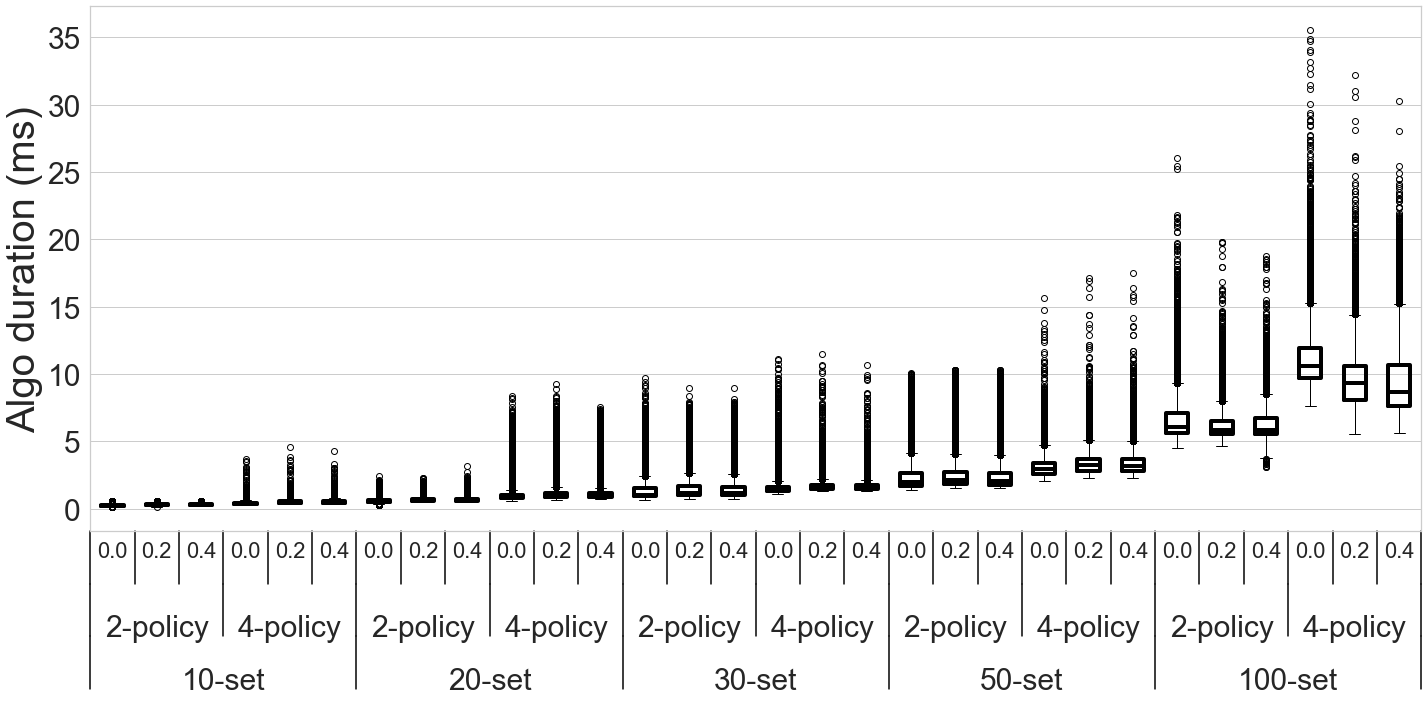

In [12]:
data = {}
for set_size in set_sizes:
    data["{}-set".format(set_size)] = {}
    for policy_size in policy_sizes:
        data["{}-set".format(set_size)]["{}-policy".format(policy_size*2)] = {}
        for error_rate in error_rates:
            data["{}-set".format(set_size)]["{}-policy".format(policy_size*2)]["{}".format(error_rate)] = 0
                
fig = plt.figure()

# Boxplot of equivalence time by all predictors
plt.figure()
sns.set_style("whitegrid")

boxprops = dict(linestyle='-', linewidth=4, color='k')
medianprops = dict(linestyle='-', linewidth=4, color='k')

ax = df_all_preds.boxplot(color="black", boxprops=boxprops, medianprops=medianprops)
ax.grid(axis='y')
plt.grid(b=None)
plt.xticks(fontsize=22)
plt.yticks(fontsize=30)
plt.ylabel("Algo duration (ms)", fontsize=40)


label_group_bar(ax, data, 30)
fig.subplots_adjust(bottom=-5)

plt.tight_layout()
plt.savefig("figures/boxplot.pdf")